In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
import sys 
from numpy import linalg

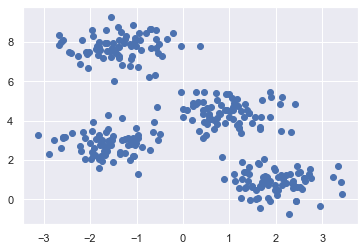

In [54]:
# manually generate dataset

# use the make_blobs() function with n_samples=300,centers=4,cluster_std=0.6 and random_state=0
# store the return value to X and y_true
# plot the dataset using plt.scatter()
X,y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()


[[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


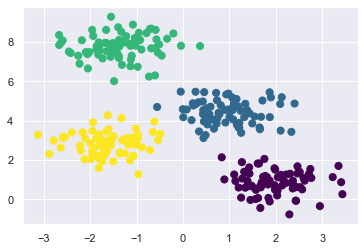

In [55]:
# use sklearn api to visualize the clustering result.

# first create the Kmeans obejct 
# then fit the data
# finally, make prediction
Cluster = KMeans(n_clusters=4)
Cluster.fit(X)
y_pred = Cluster.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis',s=50)
centers = Cluster.cluster_centers_
print(centers)
plt.show()

# kmeans = KMeans(n_clusters=4, init='k-means++').fit(X)

# # datapoints of k-centroids
# centroids = kmeans.cluster_centers_ 
# print(centroids)

In [56]:
# visualize the clustering result

# using the plt.scatter() with x=input data, y=data label, s=50 and set colormap to viridis

# sotre the centers to a variable using kmeans.cluster_centers_
# plot the center points using the plt.scatter() 
# r = np.random.RandomState(2)
# i = r.permutation(X.shape[0])[:4]
# print(r)
# print(i)


Centers:       [[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]
Labels:      [2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]


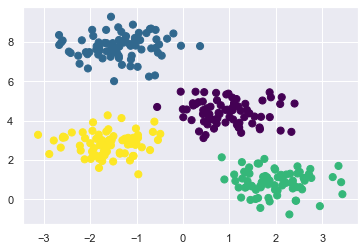

In [57]:


def find_clusters(X,n_clusters,rseed=2):
    centers=[]
#     using np.random.RandomState first to set the seed and store it to a variable r
    r=np.random.RandomState(rseed)
#     using r.permutation(data shape) to choose first k data point index as initial center.
    initial=r.permutation(X.shape[0])
#     store all the centers to a list using a for loop
    for i in range(n_clusters):
        centers.append(initial[i])
    centers=np.array(centers)
    center_old=X[centers]
#     repeat until convergence:
    while True:
#         Assign labels based on closest center using pairwise_distances_argmin()
        labels = pairwise_distances_argmin(X, center_old)
#         initialize list to contain the new centers with the dimensions k,2 with zeros: 
        centers_new=np.zeros((n_clusters,2))
        for i in range(n_clusters):
# find index where i is equal to the label
            idx=np.where(labels==i)
#             Update centroid of each cluster to be the average(mean) of examples assigned to cluster k
            centers_new[i]=X[idx].mean(0)
#             convergence if old center is new center
        if np.all(center_old == centers_new):
            break
#     return the centers and labels
        center_old = centers_new
    return center_old, labels
        
    

centers, labels = find_clusters(X, 4)
print('Centers:      ',centers)
print('Labels:     ',labels)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


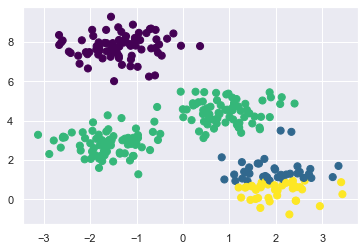

In [58]:
# fit our function to the data set with the starting point rseed=0.
# plot the figure
centers, labels = find_clusters(X, 4,rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');



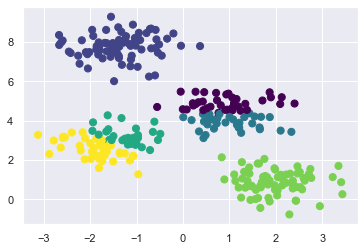

In [59]:
# fit our function to the data set with the starting point rseed=2 k=6.
# plot the figure

centers, labels = find_clusters(X, 6,rseed=2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [60]:
def eucl_dist(a, b, axis=1):
    return np.linalg.norm(a-b) #find distance using linear algebra



def all_dist(X,centers,distances): #function to find distances between each center and all points
    for i in range(X.shape[0]):
        dc=[] # initialize list to hold centers
        for j in range(len(centers)):    
            dc.append(eucl_dist(X[i], centers[j]))# find the center bewteen every point in our data and the current center
            d_final = np.amin(dc) #choose the minimum point to create the initial cluster
        distances.append(d_final)
    return np.array(distances)
    
        
        
def init_center(k,X,rseed):
#     create a empty list store centers 
    centers=[]
#         using np.random.RandomState first to set the seed and store it to a variable r
    r=np.random.RandomState(rseed)
#         using r.permutation(data shape) to choose first data point index as initial center.
    initial=r.permutation(X.shape[0])
#     append this center to the center list
    centers.append(X[initial[0]])
    dj=[] # initialize distances list
#     while the length of the list less than k:
    while len(centers)<k:
#         calculate dj for all data point: dj=min(||x^j-c_k||) whiere dj store the distance to the cloest center
        dj= all_dist(X,centers,dj)
#         calculate pj: pj=dj^2/sum_all(d^2) for all data point
        pj=(dj**2/np.sum(dj**2))
#         random choose j using the probability:
        far_point=np.argmax(pj) # use the probability to choose the center that is farthest away
#         set the new center to be x^j
#         append the new center to center list
        centers.append(X[far_point])
        dj =[] #empty the distances list to start over for the new center
#     return all centers
    return centers
   
def k_meanspp(X,n_clusters,rseed=2):
    center=init_center(n_clusters,X,rseed) #initialize the centers
    while True:
        labels = pairwise_distances_argmin(X, center)
        centers_new=np.zeros((n_clusters,2))
        for i in range(n_clusters):
            idx=np.where(labels==i)
            centers_new[i]=X[idx].mean(0)
        if np.all(center == centers_new):
            break
        center = centers_new
    return center, labels

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


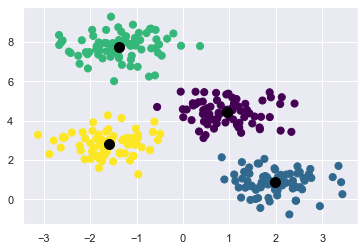

In [61]:
centers, labels = k_meanspp(X, 4,rseed=0)
print(centers)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis'); 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)
plt.show()

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [-1.37324398  7.75368871]]


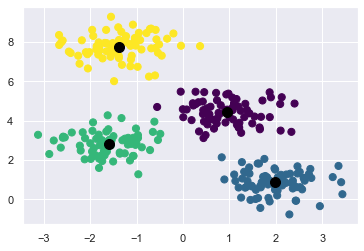

In [62]:
# fit our kmean++ function to the data set with rseed=2.
# plot the figure
centers, labels = k_meanspp(X, 4,rseed=2)
print(centers)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis'); 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)
plt.show()

In [63]:
# fit our kmean++ function to the data set with rseed=0.
# plot the figureX, k, rseed

Compare the results from 4 and 5. Is there any differences? If yes, why?

The default seed was 2. I tried with 2 and then then with 0. There was a difference between them because kmeans is sensitive to the starting conditions. SO based on how you initialized the algorithm, the clustering varies. As expected, when the seed was 0 the clustering was not optimal.

Compare the results from 8 and 9. Is there any differences? If yes,why?

There was no difference because of the way we initialize the centers of kmeans++. It allows for greater accuracy and better preformance of the find clusters algorithm. Because we pick better centers in the beginning, our results aren't as affected. 

Compare the results from 4,5,8 and 9. State your observations.

Through my observations, I concluded that kmeans++ initialization is a lot more effecient and avoids the risk of bad random initialization. Therefore, it is more accurate when creating clusters

To run the program:

Run each block normally and see the results for yourself. I plot the clusters with different seeds and number of clusters.